In [1]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing
# from sklearn import utils
import numpy as np
# import tensorflow as tf
# import keras_tuner as kt
# Display all of the columns
pd.set_option('display.max_columns', None)

In [2]:
video_game_df = pd.read_csv('videogames_final.csv')
video_game_df.head(200)

,Unnamed: 0,Game_Title,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
195,196,Resident Evil 5,PS3,2009.0,Action,Capcom,1.96,1.43,1.08,0.65,5.11
196,197,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
197,198,Grand Theft Auto: Vice City Stories,PSP,2006.0,Action,Take-Two Interactive,1.70,2.02,0.16,1.21,5.08
198,199,FIFA Soccer 11,PS3,2010.0,Sports,Electronic Arts,0.60,3.29,0.06,1.13,5.08


In [3]:
# Drops all zero (0) values from sales column
video_game_df = video_game_df[video_game_df['EU_Sales'] > 0]
video_game_df['EU_Sales']

0        29.02
1         3.58
2        12.88
3        11.01
4         8.89
         ...  
21153     0.01
21157     0.01
21159     0.01
21160     0.01
21169     0.01
Name: EU_Sales, Length: 14627, dtype: float64

In [4]:
# using Global_Sales column to create a categorical column
video_game_df['Success_sales'] = np.where(video_game_df['EU_Sales']>= 0.5, 'Good', 'Bad')

In [5]:
# Split target column from dataset
y = video_game_df['Genre']
X = video_game_df.drop(columns = ['Unnamed: 0','Global_Sales','NA_Sales','JP_Sales','Other_Sales'])

In [6]:
# Preview the data
X[-5:]

,Game_Title,Platform,Year,Genre,Publisher,EU_Sales,Success_sales
21153,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,GameMill Entertainment,0.01,Bad
21157,Tour de France 2014,PS3,2014.0,Sports,Focus Home Interactive,0.01,Bad
21159,ZombiU,XOne,2016.0,Action,Ubisoft,0.01,Bad
21160,Fast Racing Neo,WiiU,2016.0,Action,Nintendo,0.01,Bad
21169,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.01,Bad


In [7]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [8]:
# Preview the data
X.head()

,Year,EU_Sales,Game_Title_ Fire Emblem Fates,Game_Title_ Frozen: Olaf's Quest,Game_Title_ Tales of Xillia 2,Game_Title_'98 Koshien,Game_Title_.hack//G.U. Vol.2//Reminisce,Game_Title_.hack//Infection Part 1,Game_Title_.hack//Mutation Part 2,Game_Title_.hack//Outbreak Part 3,Game_Title_.hack//Quarantine Part 4: The Final Chapter,Game_Title_007 Racing,Game_Title_007: Quantum of Solace,Game_Title_007: The World is not Enough,Game_Title_007: Tomorrow Never Dies,Game_Title_10 Minute Solution,Game_Title_100 All-Time Favorites,Game_Title_100 Classic Books,Game_Title_100 Classic Games,Game_Title_1000 Cooking Recipes from ELLE Ã table,Game_Title_1001 Touch Games,Game_Title_101-in-1 Explosive Megamix,Game_Title_101-in-1 Party Megamix Wii,Game_Title_1080Â°: TenEighty Snowboarding,Game_Title_15 Days,Game_Title_1701 A.D.,Game_Title_18 Wheeler: American Pro Trucker,Game_Title_18 Wheels of Steel: Extreme Trucker,Game_Title_18 Wheels of Steel: Extreme Trucker 2,Game_Title_187: Ride or Die,Game_Title_1942,Game_Title_2 Games in 1 Double Pack: Hot Wheels Velocity X / Hot Wheels World Race,Game_Title_2 Games in 1 Double Pack: The Incredibles / Finding Nemo: The Continuing Adventures,Game_Title_2 Games in 1: Disney Princess & The Lion King,Game_Title_2 Games in 1: Disney's Brother Bear / The Lion King 1 1/2,Game_Title_2 Games in 1: Sonic Advance & ChuChu Rocket!,Game_Title_2 Games in 1: Sonic Battle & ChuChu Rocket!,Game_Title_2 Games in 1: Sonic Pinball Party & Columns Crown,Game_Title_2 Games in 1: SpongeBob SquarePants: SuperSponge & Rugrats Go Wild,Game_Title_2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe,Game_Title_2-in-1 Game Pack: Spider-Man & Spider-Man 2,Game_Title_2002 FIFA World Cup,Game_Title_2010 FIFA World Cup South Africa,Game_Title_2014 FIFA World Cup Brazil,Game_Title_24: The Game,Game_Title_25 to Life,Game_Title_2Xtreme,"Game_Title_3 in 1: Solitaire, Mahjong & Tangram",Game_Title_300: March to Glory,Game_Title_3D Baseball,Game_Title_3D Dot Game Heroes,Game_Title_3D Lemmings,Game_Title_3D Tank Warfare Simulator Panzer Front,Game_Title_3Xtreme,Game_Title_4 Elements,Game_Title_4 Play Collection - Dark Mysteries,Game_Title_40 Winks,Game_Title_4x4 EVO 2,Game_Title_4x4 Evolution,Game_Title_50 Cent: Blood on the Sand,Game_Title_50 Cent: Bulletproof,Game_Title_50 Classic Games,Game_Title_7 Days to Die,Game_Title_7 Roses: A Darkness Rises,Game_Title_7 Wonders II,Game_Title_7 Wonders of the Ancient World,Game_Title_7 Wonders: Treasures of Seven,Game_Title_A Boy and His Blob,Game_Title_A Bug's Life,Game_Title_A Collection of Activision Classic Games for the Atari 2600,Game_Title_A Collection of Classic Games from the Intellivision,Game_Title_A Game of Thrones: Genesis,Game_Title_A New Beginning,Game_Title_A Vampyre Story,Game_Title_A-Train,Game_Title_ABBA: You Can Dance,Game_Title_AC/DC LIVE: Rock Band Track Pack,Game_Title_AMF Bowling 2004,Game_Title_AMF Xtreme Bowling,Game_Title_APB Reloaded,Game_Title_ATV Offroad Fury,Game_Title_ATV Offroad Fury 2,Game_Title_ATV Offroad Fury 3,Game_Title_ATV Offroad Fury Pro,Game_Title_ATV Quad Power Racing 2,Game_Title_ATV: Quad Power Racing,Game_Title_Academy of Champions: Soccer,Game_Title_Ace Attorney Investigations: Miles Edgeworth,Game_Title_Ace Combat 04: Shattered Skies,Game_Title_Ace Combat 2,Game_Title_Ace Combat 3: Electrosphere,Game_Title_Ace Combat 5: The Unsung War,Game_Title_Ace Combat 6: Fires of Liberation,Game_Title_Ace Combat X: Skies of Deception,Game_Title_Ace Combat Zero: The Belkan War,Game_Title_Ace Combat: Assault Horizon,Game_Title_Ace Combat: Assault Horizon Legacy,Game_Title_Ace Combat: Joint Assault,Game_Title_Achtung Panzer: Kharkov 1943,Game_Title_Act of Aggression,Game_Title_Action Bass,Game_Title_Action Force,Game_Title_Active Health with Carol Vorderman,Game_Title_Active Life: Extreme Challenge,Game_Title_Active Life: Magical Carnival,Game_Title_Active Life: Outdoor Challenge,Game_Title_Activision Anthology,Game_Title_Actua Tennis,Game_Title_Adidas Power Socce

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [10]:
# Shape the data
X_train.shape

(10970, 7407)

In [11]:
# Shape the data
X_test.shape

(3657, 7407)

In [12]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
model = KNeighborsClassifier(n_neighbors=2)

In [14]:
# lab = preprocessing.LabelEncoder()
# y_train = lab.fit_transform(y_train)

In [15]:
# Fit the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [16]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array(['Racing', 'Simulation', 'Action', ..., 'Sports', 'Sports',
       'Racing'], dtype=object)

In [17]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[684,   0,   0,   0,   0,   0,   2,   0,   2,   2,   1,   0],
       [  0, 123,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0, 111,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   1, 216,   0,   3,   2,   0,   1,   2,   1,   0],
       [  0,   0,   0,   0, 130,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,  43,   0,   0,   0,   0,   0,   0],
       [137,  40,  40,  89,  56,  36, 320, 123, 123,  61,  33,   2],
       [  0,   0,   0,   0,   0,   0,   0, 132,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0, 215,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,   0,   0],
       [ 53,  24,   6,  26,  18,  12,   1,  40,  23,  34, 474,   7],
       [  9,   0,   0,   1,   5,   1,   0,   6,   6,   0,   0,  99]])

In [18]:
#Print the results
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      Action       0.77      0.99      0.87       691
   Adventure       0.66      0.99      0.79       124
    Fighting       0.70      1.00      0.83       111
        Misc       0.65      0.95      0.77       227
    Platform       0.62      0.99      0.76       131
      Puzzle       0.45      1.00      0.62        43
      Racing       0.98      0.30      0.46      1060
Role-Playing       0.44      0.99      0.61       133
     Shooter       0.58      0.99      0.73       217
  Simulation       0.43      1.00      0.60        75
      Sports       0.93      0.66      0.77       718
    Strategy       0.90      0.78      0.84       127

    accuracy                           0.72      3657
   macro avg       0.68      0.89      0.72      3657
weighted avg       0.82      0.72      0.69      3657



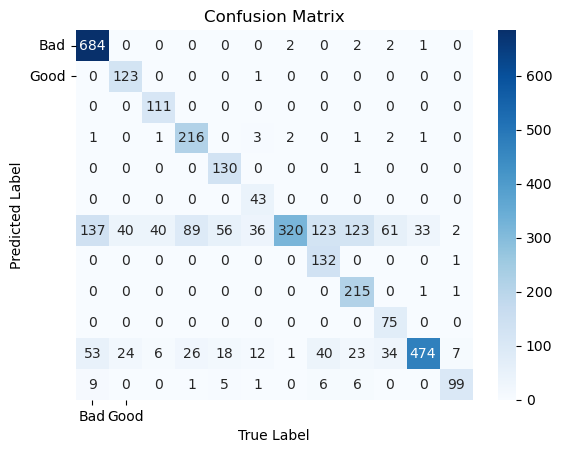

              precision    recall  f1-score   support

      Action       0.77      0.99      0.87       691
   Adventure       0.66      0.99      0.79       124
    Fighting       0.70      1.00      0.83       111
        Misc       0.65      0.95      0.77       227
    Platform       0.62      0.99      0.76       131
      Puzzle       0.45      1.00      0.62        43
      Racing       0.98      0.30      0.46      1060
Role-Playing       0.44      0.99      0.61       133
     Shooter       0.58      0.99      0.73       217
  Simulation       0.43      1.00      0.60        75
      Sports       0.93      0.66      0.77       718
    Strategy       0.90      0.78      0.84       127

    accuracy                           0.72      3657
   macro avg       0.68      0.89      0.72      3657
weighted avg       0.82      0.72      0.69      3657



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_pred, y_test))


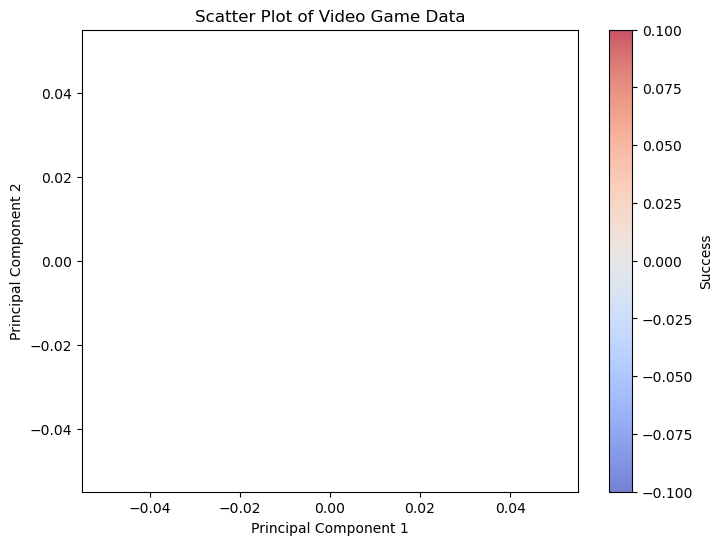

In [20]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the feature space to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert the target labels to numerical values for visualization
y_numerical = y.map({'Good': 1, 'Bad': 0})

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numerical, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Success')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Video Game Data')
plt.show()